# Bike Rental Project

In [45]:
# IMporting the pandas, numpy, matplotlib, seaborn packageds and modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import chi2_contingency
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import plotly.figure_factory as ff
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from xgboost.sklearn import XGBRegressor
import xgboost as xgb

#### Setting the Working Directory and checking the dataset

In [46]:
os.chdir("Z:/Edwisor Project 3")
os.getcwd()
#Loading the dataset and seeing the first 5 rows
day_data=pd.read_csv('day.csv',sep=',')
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Number of Rows and Columns in our DataSet

In [47]:
print("Rows:-",day_data.shape[0])
print("Columns:-",day_data.shape[1])

Rows:- 731
Columns:- 16


#### Checking the number of Missing values in our dataset

In [48]:
day_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Checking the datatypes of columns

In [49]:
day_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Checking the number of unique values in each column

In [50]:
day_data.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

#### Conversion of Datatypes

In [51]:
try:
    day_data['season'] = day_data['season'].astype('category')
    day_data['yr'] = day_data['yr'].astype('category')
    day_data['mnth'] = day_data['mnth'].astype('category')
    day_data['holiday'] = day_data['holiday'].astype('category')
    day_data['weekday'] = day_data['weekday'].astype('category')
    day_data['workingday'] = day_data['workingday'].astype('category')
    day_data['weathersit'] = day_data['weathersit'].astype('category')
    day_data["casual"] = day_data["casual"].astype(float)
    day_data["registered"] = day_data["registered"].astype(float)
    day_data["cnt"] = day_data["cnt"].astype(float)
    day_data=day_data.drop('dteday',axis=1)
    day_data=day_data.drop('instant',axis=1)
    print(day_data.dtypes)
except Exception as e:
    print(e)

#### For the EDA and problem statement file categorising the variables in two category " Continuos" and "Categorical"

In [52]:
continuous_vars = ['temp','atemp','hum','windspeed','casual','registered']

categorical_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

## 2.Exploratory Data Analysis 

### 2.1 Distribution of Categorical Variable using Factorplot

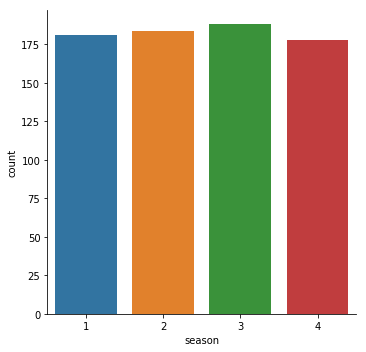

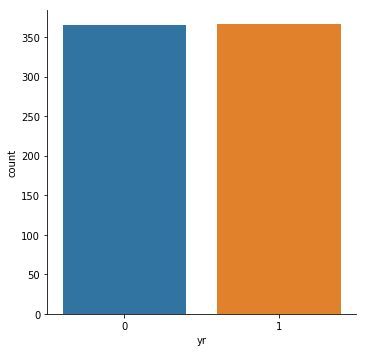

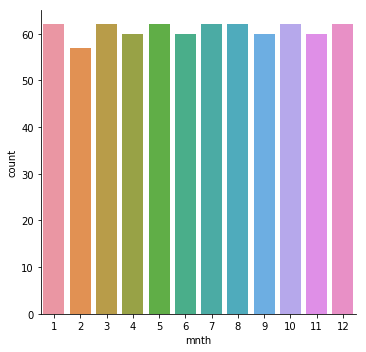

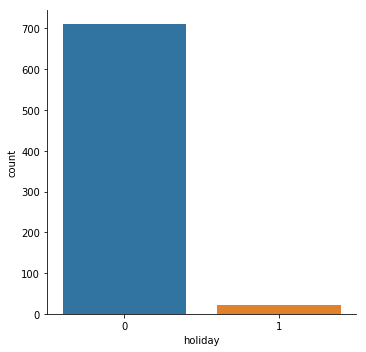

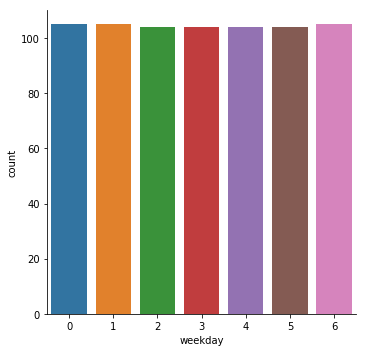

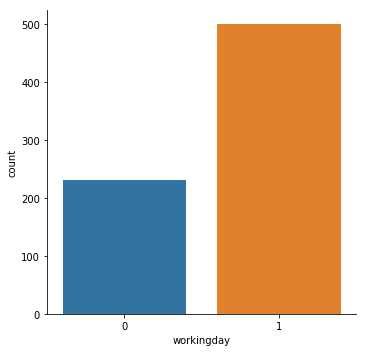

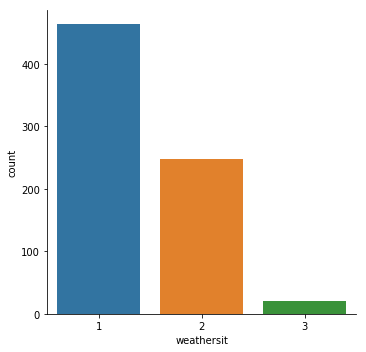

In [53]:
try:
    def factorplot_categorical_columns(day_data,categorical_vars):
        for col in categorical_vars:
            sns.factorplot(x=col,data=day_data,kind='count',size=5,aspect=1)
    factorplot_categorical_columns(day_data,categorical_vars)
except Exception as e:
    print(e)

### 2.2 Checking Normality of Continuous Variable using Histogram

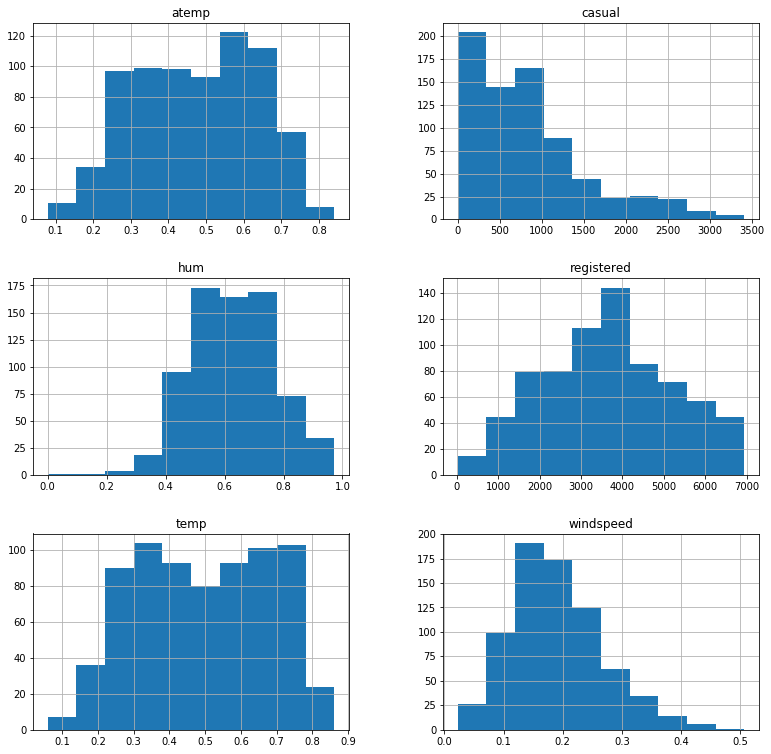

In [54]:
pd.DataFrame.hist(day_data.loc[:,continuous_vars], figsize = [13,13]);

 ### 2.3 Checking Outliers in Data using Boxplot

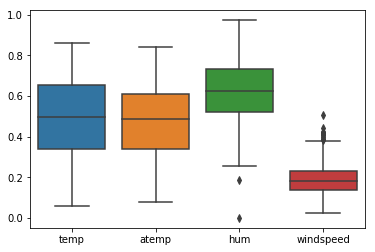

In [55]:
sns.boxplot(data=day_data[['temp','atemp','hum','windspeed']])

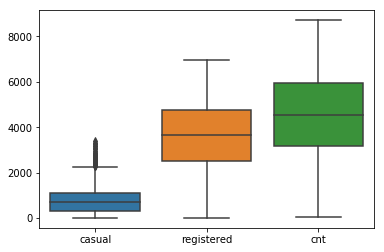

In [56]:
sns.boxplot(data=day_data[['casual','registered','cnt']])

#### Treating the extreme values with minimum and maximum values

In [57]:
try:
    extreme_value_columns = ['hum','windspeed']
    for i in extreme_value_columns:
        # Getting 75 and 25 percentile of variable "i"
        q75, q25 = np.percentile(day_data[i], [75,25])

        # Calculating Interquartile range
        iqr = q75 - q25

        # Calculating upper extream and lower extream
        minimum = q25 - (iqr*1.5)
        maximum = q75 + (iqr*1.5)

        # Replacing all the outliers value to Minimum and Maximum
        day_data.loc[day_data[i]< minimum,i] = minimum
        day_data.loc[day_data[i]> maximum,i] = maximum
    print(day_data.isnull().sum())
except Exception as e:
    print(e)

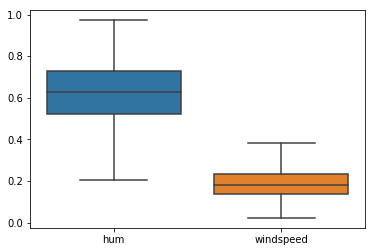

In [58]:
sns.boxplot(data=day_data[['hum','windspeed']])

 ## 3. Feature Selection

### 3.1 Chi Square test for checking the relation between categorical variables

In [59]:
try:
    factors_paired = [(i,j) for i in categorical_vars  for j in categorical_vars ] 
    chi2, p_values =[], []
    for f in factors_paired:
        if f[0] != f[1]:
            chitest = chi2_contingency(pd.crosstab(day_data[f[0]], day_data[f[1]]))
            chi2.append(chitest[0])
            p_values.append(chitest[1])
        else:
            chi2.append(0)
            p_values.append(0)

    p1 = np.array(p_values).reshape((7,7))
    p1 = pd.DataFrame(p1, index=categorical_vars, columns=categorical_vars)
    print(p1)
except Exception as e:
    print(e)

#### column 'mnth' , 'season' are having 0 chisquare, hence, removing one of them

In [60]:
try:
    day_data=day_data.drop('mnth',axis=1)
    categorical_vars = ['season','yr','holiday','weekday','workingday','weathersit']
except Exception as e:
    print(e)

 ### 3.2 Correlation Plot to check the relation between Continuous Variables

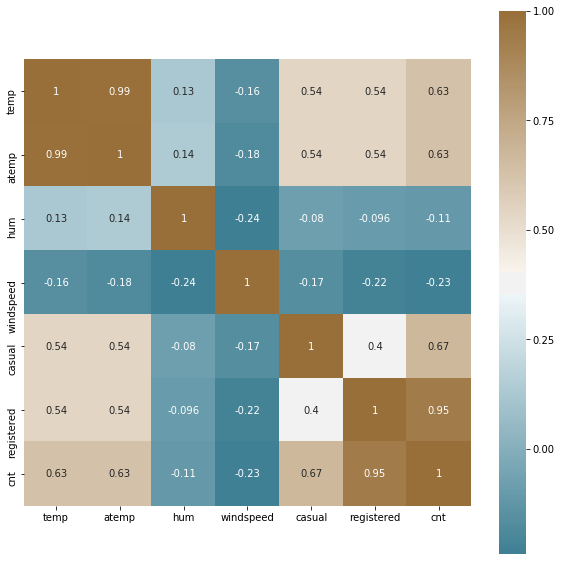

In [61]:
try:
    continuous_vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']
    df_corr = day_data.loc[:,continuous_vars]
    f, ax = plt.subplots(figsize=(10, 10))
    corr = df_corr.corr()
    #Plot using seaborn library
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
                cmap=sns.diverging_palette(220, 50, as_cmap=True),
                square=True, ax=ax, annot = True)
    plt.plot()
except Exception as e:
    print(e)

In [87]:
try:
    continuous_vars = ['temp','atemp','hum','windspeed','casual','registered']
    def calculate_vif_(X):
        variables = list(X.columns)
        vif = {variable:variance_inflation_factor(exog=X.values, exog_idx=ix) for ix,variable in enumerate(list(X.columns))}
        return vif
    print(calculate_vif_(day_data.loc[:,continuous_vars]))
except Exception as e:
    print(e)

exog contains inf or nans


Z:\anaconda\Lib\site-packages\pandas\core\indexing.py:1472: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



In [63]:
try:
    day_data=day_data.drop('atemp',axis=1)
    continuous_vars = ['temp','hum','windspeed','casual','registered','cnt']
    print(calculate_vif_(day_data.loc[:,continuous_vars]))
except Exception as e:
    print(e)

Z:\anaconda\Lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning:

divide by zero encountered in double_scalars



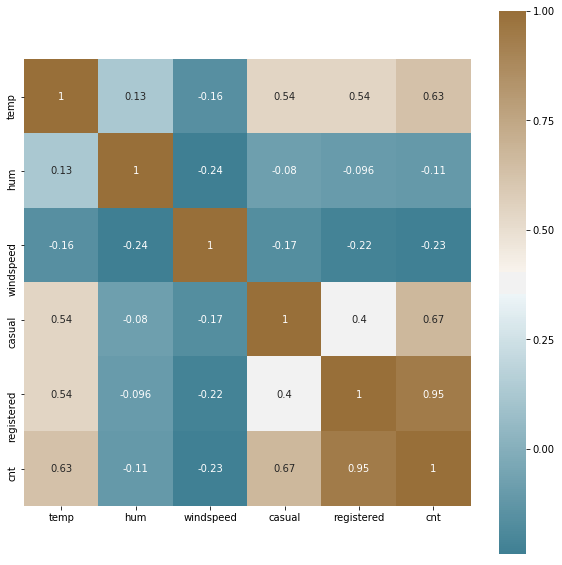

In [64]:
try:
    #Get dataframe with all continuous variables
    df_corr = day_data.loc[:,continuous_vars]
    #Set the width and hieght of the plot
    f, ax = plt.subplots(figsize=(10, 10))
    #Generate correlation matrix
    corr = df_corr.corr()
    #Plot using seaborn library
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
                cmap=sns.diverging_palette(220, 50, as_cmap=True),
                square=True, ax=ax, annot = True)
    plt.plot()
except Exception as e:
    print(e)

In [65]:
try:
    day_data=day_data.drop('registered',axis=1)
    day_data=day_data.drop('casual',axis=1)
    continuous_vars = ['temp','hum','windspeed']
    print(calculate_vif_(day_data.loc[:,continuous_vars]))
except Exception as e:
    print(e)

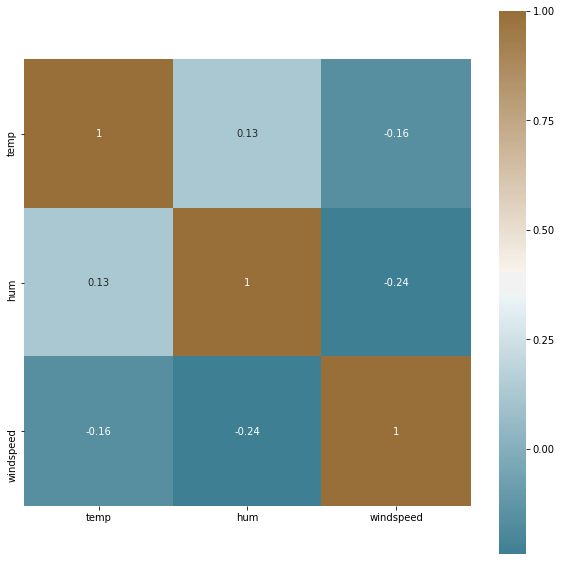

In [66]:
try:
    #Get dataframe with all continuous variables
    df_corr = day_data.loc[:,continuous_vars]
    #Check for multicollinearity using corelation graph
    #Set the width and hieght of the plot
    f, ax = plt.subplots(figsize=(10, 10))
    #Generate correlation matrix
    corr = df_corr.corr()
    #Plot using seaborn library
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
                cmap=sns.diverging_palette(220, 50, as_cmap=True),
                square=True, ax=ax, annot = True)
    plt.plot()
except Exception as e:
    print(e)

## 4. Feature Scaling

### 4.1 Creating Dummy Variables for Categorical Columns

In [67]:
try:
    weathersit=pd.get_dummies(day_data['weathersit'],prefix='weathersit',dtype = 'float')
    season=pd.get_dummies(day_data['season'],prefix='season',dtype = 'float')
    yr=pd.get_dummies(day_data['yr'],prefix='yr',dtype = 'float')
    holiday=pd.get_dummies(day_data['holiday'],prefix='holiday',dtype = 'float')
    weekday=pd.get_dummies(day_data['weekday'],prefix='weekday',dtype = 'float')
    workingday=pd.get_dummies(day_data['workingday'],prefix='workingday',dtype = 'float')
    day_data=pd.concat([day_data,weathersit,season,yr,holiday,weekday,workingday],axis=1)
    day_data=day_data.drop('weathersit',axis=1)
    day_data=day_data.drop('season',axis=1)
    day_data=day_data.drop('yr',axis=1)
    day_data=day_data.drop('holiday',axis=1)
    day_data=day_data.drop('weekday',axis=1)
    day_data=day_data.drop('workingday',axis=1)
    day_data.columns
except Exception as e:
    print(e)

### 4.2 Normalization of Numarical Variables

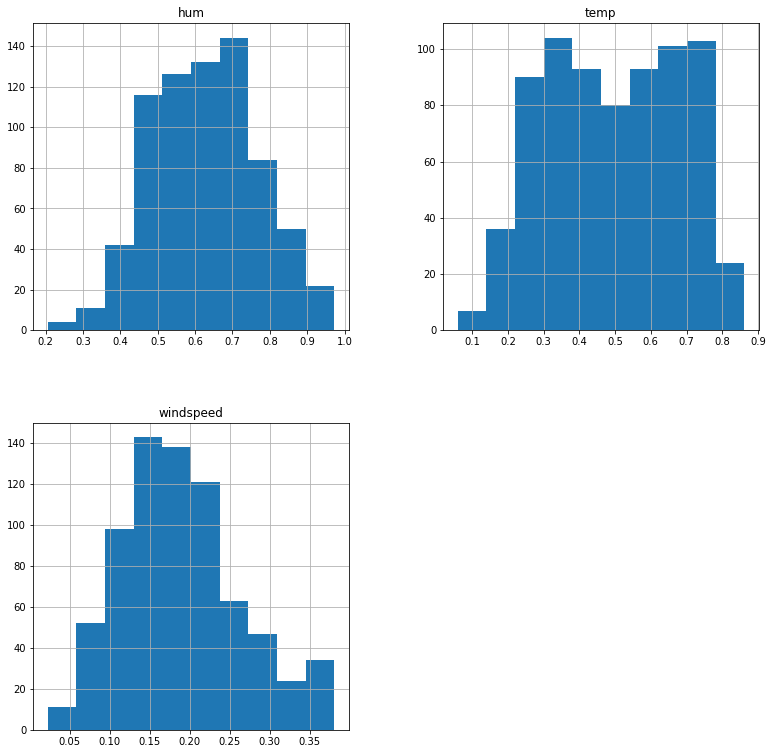

In [68]:
try:
    X = day_data.loc[:,continuous_vars]
    normalized_X = preprocessing.normalize(X)
    pd.DataFrame.hist(day_data.loc[:,continuous_vars], figsize = [13,13]);
except Exception as e:
    print(e)

# 5. Model Building

### 5.1 Spliting Data into train and test set.

In [69]:
try:
    train,test=train_test_split(day_data,test_size=0.2)
    target = day_data['cnt']
    X_train, X_test, y_train, y_test = train_test_split( day_data.iloc[:, day_data.columns != 'cnt'], target, test_size = 0.20, random_state = 1, shuffle = True)
except Exception as e:
    print(e)    

### 5.2 Define function to calculate RMSE & MAPE 

In [70]:
try:
    def RMSE(y_actual,y_predicted):
        rmse = np.sqrt(mean_squared_error(y_actual,y_predicted))
        return rmse
    def MAPE(y_true,y_predict):
        mape=np.mean(np.abs((y_true-y_predict)/y_true))*100
        return mape
except Exception as e:
    print(e)

## 5.3 Decision Tree

In [71]:
try:
    #Build decsion tree using DecisionTreeRegressor
    dt_model = DecisionTreeRegressor(random_state = 1).fit(X_train,y_train)
    regression_dt = DecisionTreeRegressor(random_state = 1)
    #Perdict for test cases
    dt_predictions = dt_model.predict(X_test)
    #Create data frame for actual and predicted values
    df_dt = pd.DataFrame({'actual': y_test, 'pred': dt_predictions})
    print(df_dt.head())
    #Calculate RMSE, MAPE,R-squared,Meaan Square Error value
    print("Root Mean Squared Error: "+str(RMSE(y_test, dt_predictions)))
    print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, dt_predictions)))
    print("Mean Squared Error: "+str(mean_squared_error(y_test, dt_predictions)))
    print("Mean Absolute Percentage Error = "+str(MAPE(y_test, dt_predictions)))
    #Checking the Consistency using Cross Validation Method creating 5 folds in our dataset
    scores = cross_val_score(regression_dt, X_test, y_test, cv=5)
    print(scores)
except Exception as e:
    print(e)

     actual    pred
404  3830.0  3272.0
726  2114.0  2236.0
159  3915.0  4401.0
422  4322.0  4911.0
512  6591.0  6031.0
Root Mean Squared Error: 805.8245365298014
R^2 Score(coefficient of determination) = 0.8242882424168301
Mean Squared Error: 649353.1836734693
Mean Absolute Percentage Error = 22.004521718790933
[0.50675791 0.41256214 0.77995464 0.64012349 0.72632459]


### 5.3.1"max_depth" parameter tuning of Decision Tree

In [72]:
try:
    max_depths = np.linspace(1, 32, 32, endpoint=True)
    for max_depth in max_depths:
        dt = DecisionTreeRegressor(max_depth=max_depth)
        dt.fit(X_train, y_train)
        dt_predictions = dt.predict(X_test)
        #Create data frame for actual and predicted values
        df_dt = pd.DataFrame({'actual': y_test, 'pred': dt_predictions})
        print("Max Depth Value:"+str(max_depth))
        print(df_dt.head())
        print("Root Mean Squared Error: "+str(RMSE(y_test, dt_predictions)))
        print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, dt_predictions)))
        print("Mean Squared Error: "+str(mean_squared_error(y_test, dt_predictions)))
        print("Mean Absolute Percentage Error = "+str(MAPE(y_test, dt_predictions)))
        scores = cross_val_score(dt, X_test, y_test, cv=5)
        print(str(scores))
        print("XXXXXXXXXXXXXXXXXXXXXXXXXXX")
except Exception as e:
    print(e)

Max Depth Value:1.0
     actual         pred
404  3830.0  3079.568182
726  2114.0  3079.568182
159  3915.0  5511.423077
422  4322.0  3079.568182
512  6591.0  5511.423077
Root Mean Squared Error: 1449.7276242531227
R^2 Score(coefficient of determination) = 0.43128762630566087
Mean Squared Error: 2101710.1845226036
Mean Absolute Percentage Error = 45.5098516441379
[0.34201021 0.54543336 0.30922139 0.40174497 0.4214286 ]
XXXXXXXXXXXXXXXXXXXXXXXXXXX
Max Depth Value:2.0
     actual         pred
404  3830.0  3998.198113
726  2114.0  3998.198113
159  3915.0  4300.389535
422  4322.0  3998.198113
512  6591.0  6596.307292
Root Mean Squared Error: 1040.9184215905611
R^2 Score(coefficient of determination) = 0.7068072427411747
Mean Squared Error: 1083511.160406585
Mean Absolute Percentage Error = 31.672144260643982
[0.54291629 0.62427015 0.63541455 0.64600622 0.62344814]
XXXXXXXXXXXXXXXXXXXXXXXXXXX
Max Depth Value:3.0
     actual         pred
404  3830.0  3145.964912
726  2114.0  3145.964912
159  

[0.55945347 0.57636741 0.70285776 0.56388057 0.84447771]
XXXXXXXXXXXXXXXXXXXXXXXXXXX
Max Depth Value:20.0
     actual    pred
404  3830.0  3272.0
726  2114.0  3292.0
159  3915.0  4401.0
422  4322.0  4911.0
512  6591.0  6031.0
Root Mean Squared Error: 825.2177516933034
R^2 Score(coefficient of determination) = 0.8157290086903443
Mean Squared Error: 680984.3377097506
Mean Absolute Percentage Error = 22.440963269170393
[0.54300974 0.44167125 0.72748919 0.64808395 0.83686155]
XXXXXXXXXXXXXXXXXXXXXXXXXXX
Max Depth Value:21.0
     actual    pred
404  3830.0  3272.0
726  2114.0  3422.0
159  3915.0  4401.0
422  4322.0  4916.0
512  6591.0  6359.0
Root Mean Squared Error: 818.9276057560813
R^2 Score(coefficient of determination) = 0.8185274794973533
Mean Squared Error: 670642.4234693878
Mean Absolute Percentage Error = 22.936102479947547
[0.40071168 0.42655877 0.72992082 0.58383341 0.83249461]
XXXXXXXXXXXXXXXXXXXXXXXXXXX
Max Depth Value:22.0
     actual    pred
404  3830.0  3272.0
726  2114.0  3

### 5.3.2 "min_samples_split" parameter tuning of Decision Tree

In [73]:
try:
    min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
    for min_samples_split in min_samples_splits:
        dt = DecisionTreeRegressor(min_samples_split=min_samples_split)
        dt.fit(X_train, y_train)
        dt_predictions = dt.predict(X_test)
        #Create data frame for actual and predicted values
        df_dt = pd.DataFrame({'actual': y_test, 'pred': dt_predictions})
        print("min_samples_split:"+str(min_samples_split))
        print(df_dt.head())
        print("Root Mean Squared Error: "+str(RMSE(y_test, dt_predictions)))
        print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, dt_predictions)))
        print("Mean Squared Error: "+str(mean_squared_error(y_test, dt_predictions)))
        print("Mean Absolute Percentage Error = "+str(MAPE(y_test, dt_predictions)))
        scores = cross_val_score(dt, X_test, y_test, cv=5)
        print(str(scores))
        print("XXXXXXXXXXXXXXXXXXXXXXXXXXX")
except Exception as e:
    print(e) 

min_samples_split:0.1
     actual         pred
404  3830.0  3145.964912
726  2114.0  3145.964912
159  3915.0  4588.964912
422  4322.0  3145.964912
512  6591.0  6641.931034
Root Mean Squared Error: 844.3347183143305
R^2 Score(coefficient of determination) = 0.8070924863053262
Mean Squared Error: 712901.11655094
Mean Absolute Percentage Error = 23.174141581479905
[0.63647455 0.45317101 0.66844643 0.73061801 0.77459044]
XXXXXXXXXXXXXXXXXXXXXXXXXXX
min_samples_split:0.2
     actual         pred
404  3830.0  3998.198113
726  2114.0  3998.198113
159  3915.0  4537.862069
422  4322.0  3998.198113
512  6591.0  7121.490909
Root Mean Squared Error: 996.6101543436884
R^2 Score(coefficient of determination) = 0.7312363909072064
Mean Squared Error: 993231.7997409502
Mean Absolute Percentage Error = 30.44552146469812
[0.64202429 0.69595069 0.7178139  0.7629085  0.63152543]
XXXXXXXXXXXXXXXXXXXXXXXXXXX
min_samples_split:0.30000000000000004
     actual         pred
404  3830.0  3998.198113
726  2114.0  

### 5.3.3 Building Decision Tree with Optimum parameters

In [74]:
try:
    #Build decsion tree using DecisionTreeRegressor
    regression_dt = DecisionTreeRegressor(random_state = 1,min_samples_split=0.1,max_depth=5)
    regression_dt_fit = regression_dt.fit(X_train,y_train)
    #Perdict for test cases
    dt_predictions = regression_dt_fit.predict(X_test)
    #Create data frame for actual and predicted values
    df_dt = pd.DataFrame({'actual': y_test, 'pred': dt_predictions})
    print(df_dt.head())
    #Calculate RMSE, R-squared,MSE, MAPE value
    print("Root Mean Squared Error: "+str(RMSE(y_test, dt_predictions)))
    print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, dt_predictions)))
    print("Mean Squared Error: "+str(mean_squared_error(y_test, dt_predictions)))
    print("Mean Absolute Percentage Error = "+str(MAPE(y_test, dt_predictions)))
    scores = cross_val_score(regression_dt, X_test, y_test, cv=5)
    print(scores)
except Exception as e:
    print(e)

     actual         pred
404  3830.0  3145.964912
726  2114.0  3145.964912
159  3915.0  4515.397260
422  4322.0  3145.964912
512  6591.0  6992.566929
Root Mean Squared Error: 855.6598219359623
R^2 Score(coefficient of determination) = 0.8018828241582973
Mean Squared Error: 732153.7308754828
Mean Absolute Percentage Error = 23.313859338848996
[0.64926984 0.64743391 0.74202605 0.75954915 0.77455239]


### 5.4 Random Forest Regression

In [75]:
try:
    #Build random forest using RandomForestRegressor
    rf_model = RandomForestRegressor(n_estimators = 500, random_state = 1).fit(X_train,y_train)
    #Perdict for test cases
    rf_predictions = rf_model.predict(X_test)
    #Create data frame for actual and predicted values
    df_rf = pd.DataFrame({'actual': y_test, 'pred': rf_predictions})
    print(df_rf.head())
    #Calculate RMSE, R-squared,MAE,MAPE value
    print("Root Mean Squared Error: "+str(RMSE(y_test, rf_predictions)))
    print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, rf_predictions)))
    print("Mean Squared Error: "+str(mean_squared_error(y_test, rf_predictions)))
    print("Mean Absolute Percentage Error = "+str(MAPE(y_test, rf_predictions)))
    # Calculating the Cross Validation Score of dataset creating 5 folds
    scores = cross_val_score(RandomForestRegressor(n_estimators = 500, random_state = 1), X_train, y_train, cv=5)
    print(scores)
except Exception as e:
    print(e)

     actual      pred
404  3830.0  3399.460
726  2114.0  2760.682
159  3915.0  4226.954
422  4322.0  4441.770
512  6591.0  6325.820
Root Mean Squared Error: 636.1281163249715
R^2 Score(coefficient of determination) = 0.8905012827349289
Mean Squared Error: 404658.9803791565
Mean Absolute Percentage Error = 16.795342739734718
[0.82918899 0.87010127 0.87822893 0.83812552 0.86715583]


### 5.3 Ceating RandomizedSearchCV to get best parameters for Random Forest

In [76]:

try:
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}
    # First create the base model to tune
    rf = RandomForestRegressor()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(X_train, y_train)
    rf_random.predict(X_test)
    df_rf_random= pd.DataFrame({'actual': y_test, 'pred': rf_random.predict(X_test)})
    print(df_rf_random.head())
    #Calculate RMSE and R-squared value
    print("Root Mean Squared Error: "+str(RMSE(y_test, rf_random.predict(X_test))))
    print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, rf_random.predict(X_test))))
    print("Mean Squared Error: "+str(mean_squared_error(y_test, rf_random.predict(X_test))))
    print("Mean Absolute Percentage Error = "+str(MAPE(y_test, rf_random.predict(X_test))))
    scores = cross_val_score(rf_random, X_train, y_train, cv=5)
    print(scores)

except Exception as e:
    print(e)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.4min finished


     actual         pred
404  3830.0  3692.513948
726  2114.0  3244.909514
159  3915.0  4005.548999
422  4322.0  4018.075465
512  6591.0  6476.718526
Root Mean Squared Error: 669.1462547105488
R^2 Score(coefficient of determination) = 0.8788392503558434
Mean Squared Error: 447756.71019315463
Mean Absolute Percentage Error = 16.939577250729236
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.9min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.9min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.8min finished
Z:\anaconda\Lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.7min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished


[0.82898843 0.89646846 0.85719196 0.82953395 0.86699488]


### 5.4 Tuning Random Forest with best estimetor parameters

In [77]:
try:
    best_random = rf_random.best_estimator_
    df_best_random= pd.DataFrame({'actual': y_test, 'pred': best_random.predict(X_test)})
    print(df_best_random.head())
    #Calculate RMSE and R-squared value
    print("Root Mean Squared Error: "+str(RMSE(y_test, best_random.predict(X_test))))
    print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, best_random.predict(X_test))))
    print("Mean Squared Error: "+str(mean_squared_error(y_test, best_random.predict(X_test))))
    print("Mean Absolute Percentage Error = "+str(MAPE(y_test, best_random.predict(X_test))))
    scores = cross_val_score(best_random, X_train, y_train, cv=5)
    print(scores)
except Exception as e:
    print(e)

     actual         pred
404  3830.0  3692.513948
726  2114.0  3244.909514
159  3915.0  4005.548999
422  4322.0  4018.075465
512  6591.0  6476.718526
Root Mean Squared Error: 669.1462547105488
R^2 Score(coefficient of determination) = 0.8788392503558434
Mean Squared Error: 447756.71019315463
Mean Absolute Percentage Error = 16.939577250729236


### 5.5 Linear Regression

In [78]:
try:
    #Train the model
    lr_model = LinearRegression().fit(X_train , y_train)
    #Perdict for test cases
    lr_predictions = lr_model.predict(X_test)
    #Create data frame for actual and predicted values
    df_lr = pd.DataFrame({'actual': y_test, 'pred': lr_predictions})
    print(df_lr.head())
    #Calculate RMSE and R-squared value
    print("Root Mean Squared Error: "+str(RMSE(y_test, lr_predictions)))
    print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, lr_predictions)))
    print("Mean Squared Error: "+str(mean_squared_error(y_test, lr_predictions)))
    print("Mean Absolute Percentage Error = "+str(MAPE(y_test, lr_predictions)))
    scores = cross_val_score(LinearRegression(), X_test, y_test, cv=5)
    print(scores)
except Exception as e:
    print(e)

     actual         pred
404  3830.0  3873.783754
726  2114.0  2836.326089
159  3915.0  5414.663904
422  4322.0  4044.089368
512  6591.0  6501.565392
Root Mean Squared Error: 772.881955334337
R^2 Score(coefficient of determination) = 0.838360989048141
Mean Squared Error: 597346.5168814282
Mean Absolute Percentage Error = 17.248585789475605
[0.8181093  0.69417327 0.89064965 0.69352233 0.85180791]


### 5.6 Ridge Regression with Cross Validation

In [79]:
try:
    reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
    reg_model=reg.fit(X_train,y_train)
    reg_predict=reg_model.predict(X_test)
    #Create data frame for actual and predicted values
    df_reg = pd.DataFrame({'actual': y_test, 'pred': reg_predict})
    print(df_reg.head())
    print("Optimum Value of Alpha :-"+str(reg.alpha_))
    reg = linear_model.RidgeCV(alphas=reg.alpha_,cv=5)
    #Calculate RMSE and R-squared value
    print("Root Mean Squared Error: "+str(RMSE(y_test, reg_predict)))
    print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, reg_predict)))
    print("Mean Squared Error: "+str(mean_squared_error(y_test, reg_predict)))
    print("Mean Absolute Percentage Error = "+str(MAPE(y_test, reg_predict)))
except Exception as e:
    print(e)

     actual         pred
404  3830.0  3878.402418
726  2114.0  2852.726242
159  3915.0  5375.400478
422  4322.0  4042.939994
512  6591.0  6497.510581
Optimum Value of Alpha :-0.1
Root Mean Squared Error: 773.0706291377687
R^2 Score(coefficient of determination) = 0.8382820616797478
Mean Squared Error: 597638.1976354655
Mean Absolute Percentage Error = 17.131082984350297


### 5.7 Lasso Regression

In [80]:
try:
    reg_lasso = linear_model.Lasso()
    reg_lasso_model=reg_lasso.fit(X_train,y_train)
    reg_lasso_predict=reg_lasso_model.predict(X_test)
    #Create data frame for actual and predicted values
    df_lasso_reg = pd.DataFrame({'actual': y_test, 'pred': reg_lasso_predict})
    print(df_lasso_reg.head())
    print("Optimum Value of Alpha :-"+str(reg_lasso.alpha))
    print("Root Mean Squared Error: "+str(RMSE(y_test, reg_lasso_predict)))
    print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, reg_lasso_predict)))
    print("Mean Squared Error: "+str(mean_squared_error(y_test, reg_lasso_predict)))
    print("Mean Absolute Percentage Error = "+str(MAPE(y_test, reg_lasso_predict)))
except Exception as e:
    print(e)

     actual         pred
404  3830.0  3873.790974
726  2114.0  2863.803942
159  3915.0  5339.054961
422  4322.0  4046.484738
512  6591.0  6506.473747
Optimum Value of Alpha :-1.0
Root Mean Squared Error: 770.7713852718183
R^2 Score(coefficient of determination) = 0.8392425846185673
Mean Squared Error: 594088.5283538378
Mean Absolute Percentage Error = 16.93454447112545


### 5.8 KNN Regression

In [81]:
try:
    KNN_model=KNeighborsRegressor(n_neighbors=1).fit(X_train,y_train)
    KNN_predictions=KNN_model.predict(X_test)
    #Create data frame for actual and predicted values
    df_knn = pd.DataFrame({'actual': y_test, 'pred': KNN_predictions})
    print(df_knn.head())
    regression = KNeighborsRegressor(n_neighbors=1)
    #Calculate RMSE, R-squared, MSE, MAPE value
    print("Root Mean Squared Error: "+str(RMSE(y_test, KNN_predictions)))
    print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, KNN_predictions)))
    print("Mean Squared Error: "+str(mean_squared_error(y_test, KNN_predictions)))
    print("Mean Absolute Percentage Error = "+str(MAPE(y_test, KNN_predictions)))
    scores = cross_val_score(regression, X_test, y_test, cv=5)
    print(scores)
except Exception as e:
    print(e)

     actual    pred
404  3830.0  3272.0
726  2114.0  4097.0
159  3915.0  3767.0
422  4322.0  5298.0
512  6591.0  6118.0
Root Mean Squared Error: 1091.2167146664071
R^2 Score(coefficient of determination) = 0.6777878832259872
Mean Squared Error: 1190753.918367347
Mean Absolute Percentage Error = 24.119590467065137
[0.4099426  0.50329261 0.69952593 0.01981417 0.47509657]


### 5.8.1  Parameter tuning for KNN

In [82]:
try:
    k_range = range(1,5)
    # list of scores from k_range
    k_scores = []
    # we will loop through reasonable values of k
    for k in k_range:
        print("For K value :-"+str(k))
        knn = KNeighborsRegressor(n_neighbors=k)
        KNN_model=knn.fit(X_train,y_train)
        KNN_predictions=KNN_model.predict(X_test)
        df_knn = pd.DataFrame({'actual': y_test, 'pred': KNN_predictions})
        print(df_knn.head())
        print("Root Mean Squared Error: "+str(RMSE(y_test, KNN_predictions)))
        print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, KNN_predictions)))
        print("Mean Squared Error: "+str(mean_squared_error(y_test, KNN_predictions)))
        print("Mean Absolute Percentage Error = "+str(MAPE(y_test, KNN_predictions)))
        scores = cross_val_score(regression, X_test, y_test, cv=5)
        print(str(scores))
        print("---XXXXXXXXXXXXXXXXXXXXXXXXXX---")
except Exception as e:
    print(e)


For K value :-1
     actual    pred
404  3830.0  3272.0
726  2114.0  4097.0
159  3915.0  3767.0
422  4322.0  5298.0
512  6591.0  6118.0
Root Mean Squared Error: 1091.2167146664071
R^2 Score(coefficient of determination) = 0.6777878832259872
Mean Squared Error: 1190753.918367347
Mean Absolute Percentage Error = 24.119590467065137
[0.4099426  0.50329261 0.69952593 0.01981417 0.47509657]
---XXXXXXXXXXXXXXXXXXXXXXXXXX---
For K value :-2
     actual    pred
404  3830.0  3282.0
726  2114.0  4086.0
159  3915.0  4171.0
422  4322.0  4461.0
512  6591.0  6548.0
Root Mean Squared Error: 1011.4726634860637
R^2 Score(coefficient of determination) = 0.7231604412392815
Mean Squared Error: 1023076.9489795918
Mean Absolute Percentage Error = 23.62171383828002
[0.4099426  0.50329261 0.69952593 0.01981417 0.47509657]
---XXXXXXXXXXXXXXXXXXXXXXXXXX---
For K value :-3
     actual         pred
404  3830.0  3875.333333
726  2114.0  3326.333333
159  3915.0  3402.333333
422  4322.0  4114.666667
512  6591.0  6564

### 5.8.2  Final KNN Model after tuning

In [83]:
try:
    KNN_model=KNeighborsRegressor(n_neighbors=2).fit(X_train,y_train)
    KNN_predictions=KNN_model.predict(X_test)
    #Create data frame for actual and predicted values
    df_knn = pd.DataFrame({'actual': y_test, 'pred': KNN_predictions})
    print(df_knn.head())
    regression = KNeighborsRegressor(n_neighbors=1)
    #Calculate RMSE and R-squared value
    print("Root Mean Squared Error: "+str(RMSE(y_test, KNN_predictions)))
    print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, KNN_predictions)))
    print("Mean Squared Error: "+str(mean_squared_error(y_test, KNN_predictions)))
    print("Mean Absolute Percentage Error = "+str(MAPE(y_test, KNN_predictions)))
    scores = cross_val_score(regression, X_test, y_test, cv=5)
    print(scores)
except Exception as e:
    print(e)

     actual    pred
404  3830.0  3282.0
726  2114.0  4086.0
159  3915.0  4171.0
422  4322.0  4461.0
512  6591.0  6548.0
Root Mean Squared Error: 1011.4726634860637
R^2 Score(coefficient of determination) = 0.7231604412392815
Mean Squared Error: 1023076.9489795918
Mean Absolute Percentage Error = 23.62171383828002
[0.4099426  0.50329261 0.69952593 0.01981417 0.47509657]


### 5.9  XGBoost Regression

In [90]:
try:
    xclas = XGBRegressor(max_depth=5)
    xclas.fit(X_train, y_train)  
    xclas.predict(X_test)
    df_xclas= pd.DataFrame({'actual': y_test, 'pred': xclas.predict(X_test)})
    print(df_xclas.head())
    #Calculate RMSE, R-squared, MSE, MAPE value
    print("Root Mean Squared Error: "+str(RMSE(y_test, xclas.predict(X_test))))
    print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, xclas.predict(X_test))))
    print("Mean Squared Error: "+str(mean_squared_error(y_test, xclas.predict(X_test))))
    print("Mean Absolute Percentage Error = "+str(MAPE(y_test, xclas.predict(X_test))))
    scores = cross_val_score(xclas, X_test, y_test, cv=5)
    print(scores)    
except Exception as e:
    print(e)

Z:\anaconda\Lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



     actual         pred
404  3830.0  3586.740234
726  2114.0  2538.117188
159  3915.0  4242.078613
422  4322.0  4516.276367
512  6591.0  6517.520996
Root Mean Squared Error: 654.7982121829048
R^2 Score(coefficient of determination) = 0.8839794770527052
Mean Squared Error: 428760.69867792836
Mean Absolute Percentage Error = 16.974939473586584


Z:\anaconda\Lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

Z:\anaconda\Lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

Z:\anaconda\Lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

Z:\anaconda\Lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

Z:\anaconda\Lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[0.76331104 0.76085693 0.85011462 0.81125622 0.82054458]


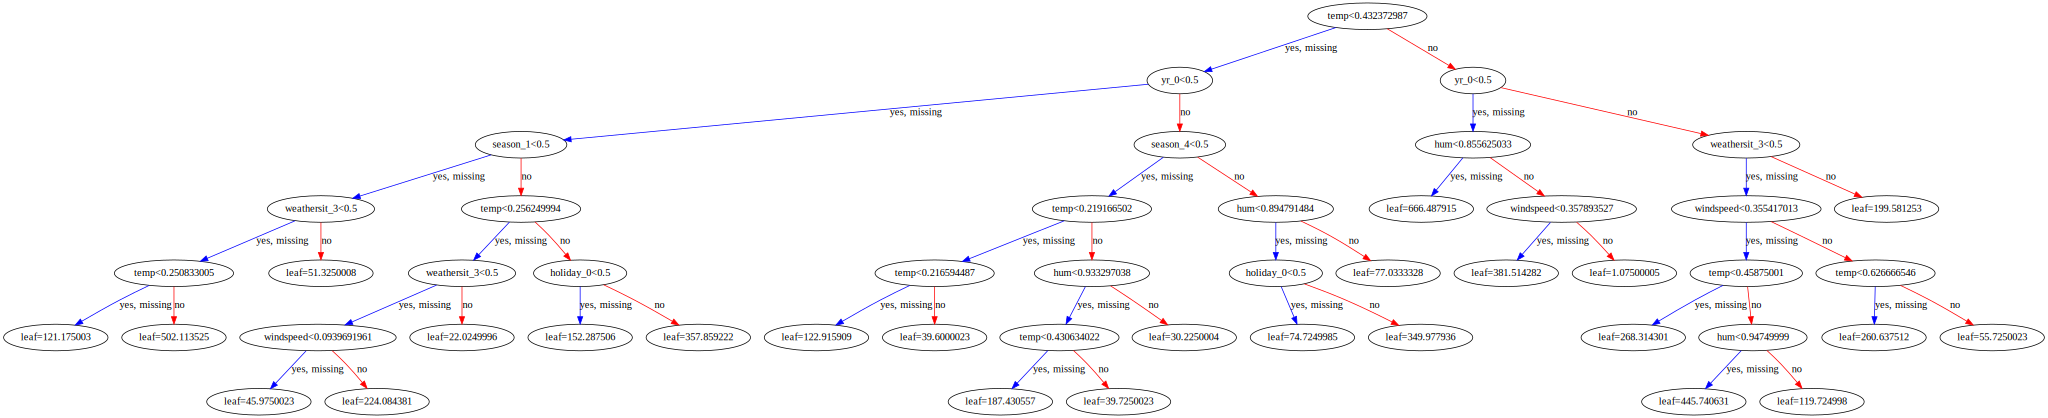

In [91]:
xgb.to_graphviz(xclas)

### 5.10 Model Output Table

In [86]:
try:
    #gives model report in dataframe
    def model_report(model,X_train,X_test,y_train,y_test,name) :
        model.fit(X_train,y_train)
        predictions=model.predict(X_test)
        RMSE_Score=RMSE(y_test,predictions)
        R_Squared_Score = r2_score(y_test,predictions)
        MSE_score       = mean_squared_error(y_test,predictions)
        MAPE_score      = MAPE(y_test,predictions)
        df = pd.DataFrame({"Model"           : [name],
                           "RMSE"            : [RMSE_Score],
                           "R^2 Score"       : [R_Squared_Score],
                           "MSE"             : [MSE_score],
                           "MAPE"            : [MAPE_score],
                           })
        return df
    #outputs for every model
    model1 = model_report(DecisionTreeRegressor(random_state = 1,min_samples_split=0.1,max_depth=5),X_train,X_test,y_train,y_test,"Decision Tree")
    model2 = model_report(RandomForestRegressor(n_estimators = 500, random_state = 1),X_train,X_test,y_train,y_test,"Random Forest")
    model3 = model_report(best_random,X_train,X_test,y_train,y_test,"Random Forest Best Parameter")
    model4 = model_report(LinearRegression(),X_train,X_test,y_train,y_test,"Linear Regression")
    model5 = model_report(KNeighborsRegressor(n_neighbors=1),X_train,X_test,y_train,y_test,"K Nearest Neighbour Regression")
    model6 = model_report(xclas,X_train,X_test,y_train,y_test,"XGBoost")
    model7 = model_report(linear_model.Ridge(),X_train,X_test,y_train,y_test,"Ridge Regression")
    model8 = model_report(reg_lasso,X_train,X_test,y_train,y_test,"LASSO Regression")

    #concat all models
    model_performances = pd.concat([model1,model2,model3,model4,model5,model6,model7,model8],axis = 0).reset_index()
    model_performances = model_performances.drop(columns = "index",axis =1)
    table  = ff.create_table(np.round(model_performances,4))
    py.iplot(table)

except Exception as e:
    print(e)

Z:\anaconda\Lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

